In [133]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Path specification

In [134]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# Classification number setting

In [135]:
NUM_CLASSES = 10

# Load training data

In [136]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [137]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model construction

In [139]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [140]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_12 (Dropout)        (None, 42)                0         
                                                                 
 dense_18 (Dense)            (None, 20)                860       
                                                                 
 dropout_13 (Dropout)        (None, 20)                0         
                                                                 
 dense_19 (Dense)            (None, 10)                210       
                                                                 
 dense_20 (Dense)            (None, 10)                110       
                                                                 
Total params: 1,180
Trainable params: 1,180
Non-trainable params: 0
_________________________________________________________________


In [141]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Early stopping callback
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [142]:
# Model compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [143]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
71/71 [==============================] - ETA: 0s - loss: 2.2402 - accuracy: 0.1274
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
71/71 [==============================] - 1s 5ms/step - loss: 2.2402 - accuracy: 0.1274 - val_loss: 2.0948 - val_accuracy: 0.2973
Epoch 2/1000
70/71 [============================>.] - ETA: 0s - loss: 2.0296 - accuracy: 0.2173
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
71/71 [==============================] - 0s 2ms/step - loss: 2.0287 - accuracy: 0.2170 - val_loss: 1.8754 - val_accuracy: 0.2729
Epoch 3/1000
68/71 [===========================>..] - ETA: 0s - loss: 1.8883 - accuracy: 0.2619
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
71/71 [==============================] - 0s 2ms/step - loss: 1.8858 - accuracy: 0.2634 - val_loss: 1.7024 - val_accuracy: 0.3323
Epoch 4/1000
69/71 [============================>.] - ETA: 0s - loss: 1.7667 - accuracy: 0.3026
E

In [144]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

24/24 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.9148


In [145]:
# Load saved model
model = tf.keras.models.load_model(model_save_path)

In [146]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 60ms/step
[1.7503130e-01 9.7589176e-03 8.5340605e-07 3.0470587e-04 2.0850359e-03
 3.4366694e-04 2.1492576e-03 1.8021850e-01 6.2951136e-01 5.9640879e-04]
8


# Confusion matrix

95/95 [==============================] - 0s 899us/step


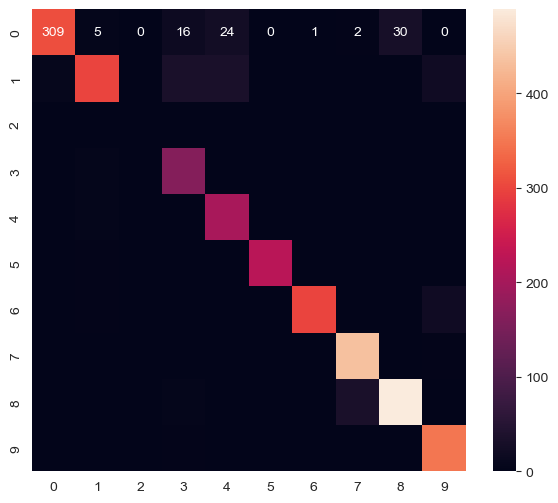

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       387
           1       0.94      0.76      0.84       394
           2       0.00      0.00      0.00         1
           3       0.74      0.98      0.84       168
           4       0.78      0.97      0.86       210
           5       1.00      0.98      0.99       227
           6       0.99      0.93      0.96       321
           7       0.92      0.99      0.96       439
           8       0.94      0.92      0.93       529
           9       0.89      0.99      0.94       351

    accuracy                           0.91      3027
   macro avg       0.82      0.83      0.82      3027
weighted avg       0.92      0.91      0.91      3027


C:\Users\sd\anaconda3\envs\blindseer-pi\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sd\anaconda3\envs\blindseer-pi\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sd\anaconda3\envs\blindseer-pi\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to Tensorflow-Lite model

In [148]:
# Save as inference-only model
model.save(model_save_path, include_optimizer=False)

In [149]:
# Convert model (quantization)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\sd\AppData\Local\Temp\tmph_n4es8p\assets


INFO:tensorflow:Assets written to: C:\Users\sd\AppData\Local\Temp\tmph_n4es8p\assets


6872

 # Inference test

In [150]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [151]:
# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [152]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [153]:
%%time
# Inference
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [154]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.7503121e-01 9.7589083e-03 8.5340685e-07 3.0470497e-04 2.0850366e-03
 3.4366638e-04 2.1492562e-03 1.8021862e-01 6.2951136e-01 5.9640763e-04]
8
